In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score,confusion_matrix

In [ ]:
# loading the dataset

df = pd.read_csv('D:\Medical diagnosis AI\Datasets\Breast_cancer_data.csv')

In [85]:
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [86]:
df.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


In [88]:
df.shape

(569, 6)

In [89]:
df.isnull().sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

In [90]:
df.isna().sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

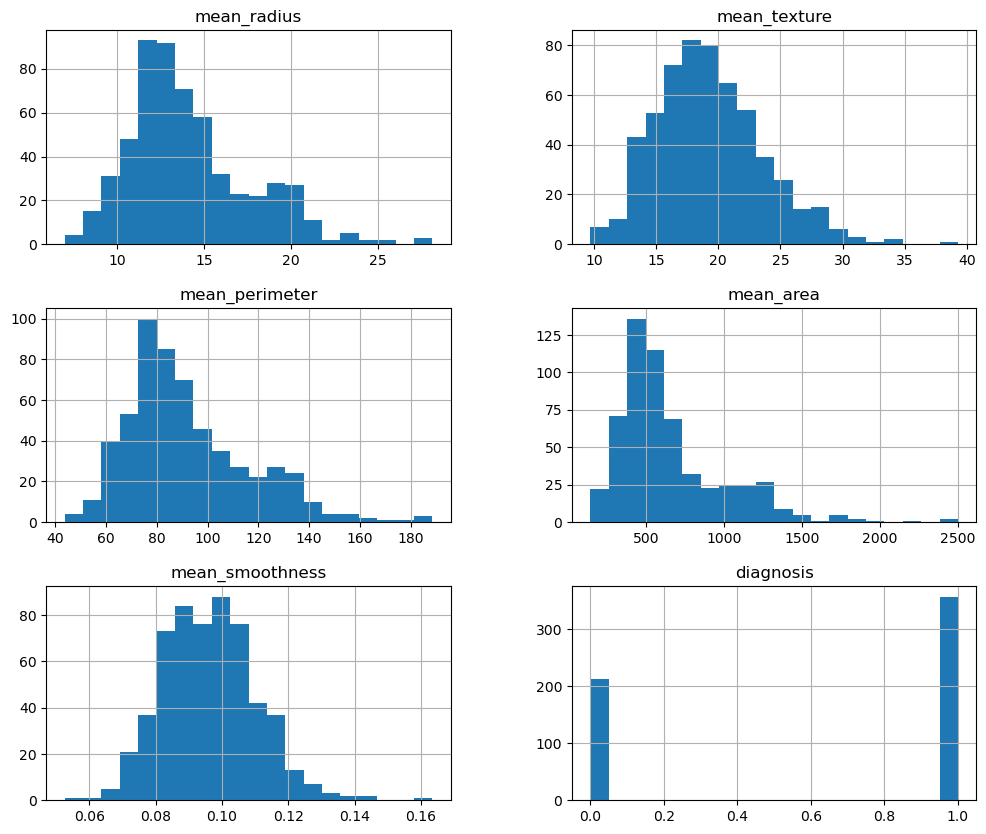

In [91]:
# data visualizations

df.hist(figsize=(12, 10), bins=20)
plt.show()

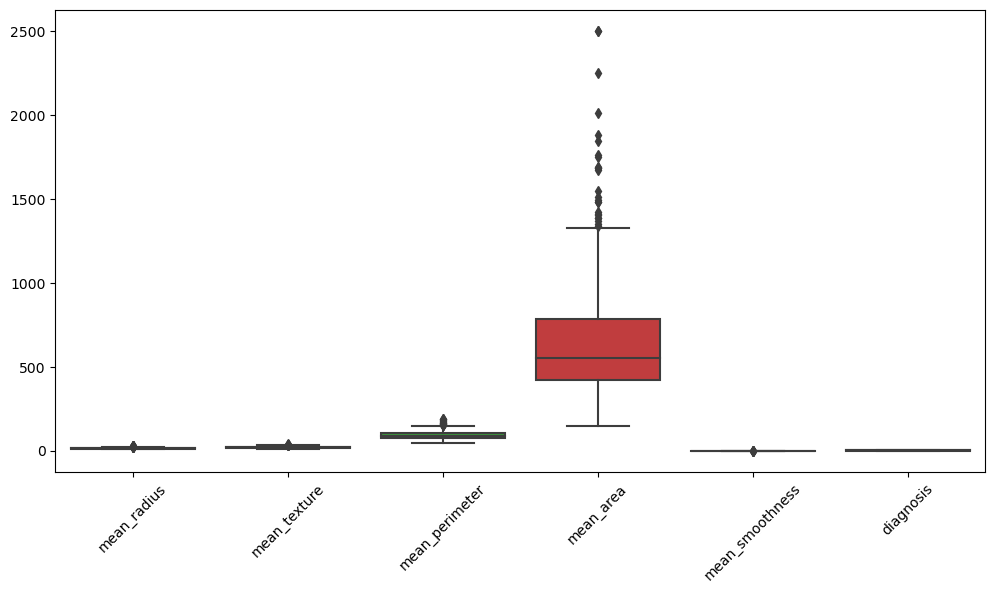

In [92]:
# box plots

plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.show()

In [93]:
# Data cleaning

# we can see there are so many outliers
# so lets handle them 

# List of columns with outliers (excluding Glucose and Outcome)
cols_with_outliers = ['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area', 'mean_smoothness']

Q1 = df[cols_with_outliers].quantile(0.25)
Q3 = df[cols_with_outliers].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [94]:
for col in cols_with_outliers:
    df[col] = np.where(df[col] < lower_bound[col], lower_bound[col], df[col])
    df[col] = np.where(df[col] > upper_bound[col], upper_bound[col], df[col])

In [95]:
((df[cols_with_outliers] < lower_bound) | (df[cols_with_outliers] > upper_bound)).sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
dtype: int64

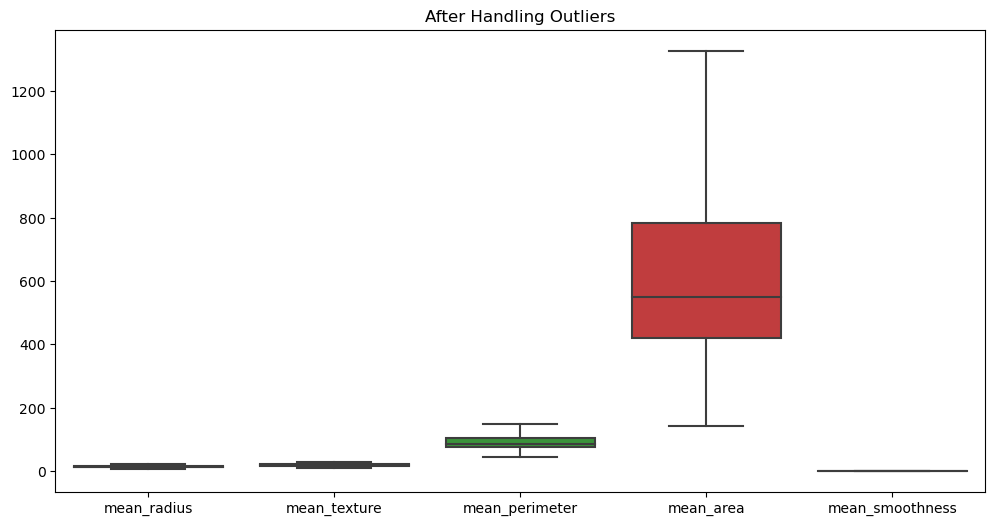

In [96]:
# visualizing data after handling the outliers


plt.figure(figsize=(12, 6))
sns.boxplot(data=df[cols_with_outliers])
plt.title("After Handling Outliers")
plt.show()

In [97]:
df.corr()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
mean_radius,1.000000,0.332760,0.997692,0.993891,0.167672,-0.745217
mean_texture,0.332760,1.000000,0.339588,0.341552,-0.015997,-0.419123
mean_perimeter,0.997692,0.339588,1.000000,0.991861,0.204990,-0.759006
mean_area,0.993891,0.341552,0.991861,1.000000,0.167400,-0.752786
mean_smoothness,0.167672,-0.015997,0.204990,0.167400,1.000000,-0.366931
diagnosis,-0.745217,-0.419123,-0.759006,-0.752786,-0.366931,1.000000


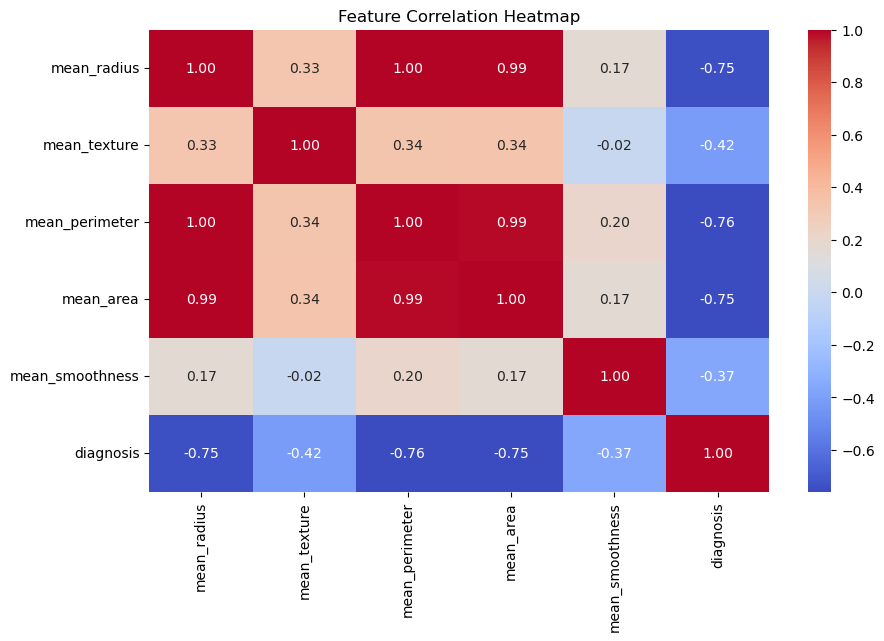

In [98]:
# correlation heatmap

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [99]:
df = df.drop(columns=['mean_smoothness'])  

In [100]:
# Splitting data
X = df.drop(columns=['diagnosis'])  # Features
y = df['diagnosis']  # Target variable

In [101]:
#standardisation
from sklearn.preprocessing import StandardScaler
SS=StandardScaler()
SS_X=SS.fit_transform(X)
pd.DataFrame(SS_X)

,0,1,2,3
0,1.176800,-2.121200,1.357375,1.184085
1,1.949929,-0.354875,1.795991,2.249396
2,1.686226,0.476899,1.670052,1.846217
3,-0.791983,0.268955,-0.606410,-0.831485
4,1.866023,-1.174698,1.891531,2.154338
...,...,...,...,...
564,2.246595,0.749377,2.191180,2.250380
565,1.818077,2.150007,1.722165,2.036334
566,0.760269,2.109375,0.727678,0.715676
567,1.958919,2.408144,2.108668,2.049446


In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [103]:
#Model fitting
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression()

In [104]:
Y_pred=logreg.predict(X_test)

In [105]:
#Metrics

cm=confusion_matrix(y_test,Y_pred)
print("confusion matrix:", cm)
print("Accuracy score:",accuracy_score(y_test,Y_pred).round(2))

confusion matrix: [[38  4]
 [ 5 67]]
Accuracy score: 0.92


In [107]:
# building a predictive system

input_data = (-1.174698, 1.89153, 2.154338,1.5678)

# changing the input data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

#re sahpe the numpy array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# # standardize the data
# std_data = scalar.transform(input_data_reshaped)

prediction = logreg.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
    print("The person does not have Breast cancer")
    
else:
    print("The person has Breast cancer")

[0]
The person does not have Breast cancer


C:\ProgramData\anaconda4\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [108]:
# saving the model

import pickle

In [109]:
filename = 'Breast_cancer_model.sav'
pickle.dump(logreg, open(filename, 'wb'))

In [110]:
# loading the saved model
loaded_model = pickle.load(open('Breast_cancer_model.sav', 'rb'))

In [111]:
for column in X_train.columns:
    print(column)

mean_radius
mean_texture
mean_perimeter
mean_area
